In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
evaluation_df = pd.read_csv('../evaluation/summary_result.csv')
evaluation_df.head()

,task,model_name,score,abstention_rate
0,1-1,Gemini-1.5-Flash,0.171245,0.000000
1,1-2,Gemini-1.5-Flash,0.742857,0.000000
2,2-1,Gemini-1.5-Flash,0.499720,0.000000
3,2-10,Gemini-1.5-Flash,0.312723,0.000000
4,2-2,Gemini-1.5-Flash,0.647887,0.042254


### Chart 1

In [27]:
# Task labels for the radar chart
tasks_dict = {
    "1-1": "Article Recitation",
    "1-2": "Knowledge\nQuestion Answering",
    "2-1": "Document\nProofreading",
    "2-2": "Dispute Focus\nIdentification", 
    "2-3": "Marital Disputes\nIdentification",
    "2-4": "Issue Topic\nIdentification",
    "2-5": "Reading\nComprehension",
    "2-6": "Named-Entity Recognition",
    "2-7": "Opinion Summarization",
    "2-9": "Event Detection",
    "2-10": "Trigger Word\nExtraction",
    "3-1": "Fact-based Article\nPrediction",
    "3-2": "Scene-based Article\nPrediction",
    "3-3": "Charge Prediction",
    "3-4": "Prison Term\nPrediction\nw.o. Article",
    "3-5": "Prison Term\nPrediction\nw. Article",
    "3-6": "Case Analysis",
    "3-7": "Consultation",
}
tasks_key_list = list(tasks_dict.keys())
tasks_list = [tasks_dict[ele] for ele in tasks_key_list]

In [28]:
# Data for models and their corresponding scores
models = list(set(evaluation_df.model_name))

In [29]:
models

['Qwen2.5-7B-Instruct-Finetune-Law',
 'GPT-4o',
 'Gemini-1.5-Flash',
 'Vistral-7B-Chat',
 'Qwen2.5-7B-Instruct',
 'Ml4uLLM-7B-Chat']

In [34]:

data = {}
models_check = [
    'Qwen2.5-7B-Instruct-Finetune-Law',
    'GPT-4o',
    'Gemini-1.5-Flash',
    'Vistral-7B-Chat',
    'Qwen2.5-7B-Instruct',
    'Ml4uLLM-7B-Chat'
]
for model in models:
    if model not in models_check: continue
    data[model] = []
    for task in tasks_key_list:
        try:
            data[model].append(evaluation_df[(evaluation_df["model_name"] == model) & (evaluation_df['task'] == task)]['score'].iloc[0])
        except:
            print(model, task)
            raise Exception

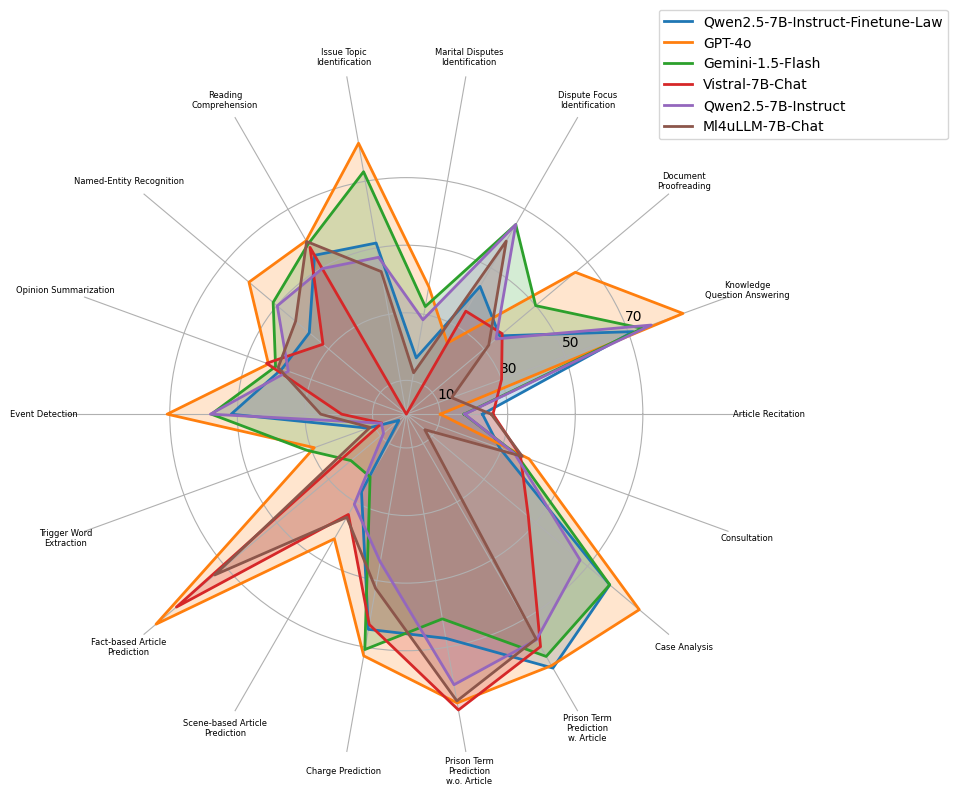

In [35]:
# Normalize number of tasks
data_points = len(tasks_list)
angles = np.linspace(0, 2 * np.pi, data_points, endpoint=False).tolist()
angles += angles[:1]  # Ensure the chart closes

# Create the radar chart
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={"polar": True})

# Add each model's data to the radar chart
for model_name, scores in data.items():
    scores = list(scores) + scores[:1]  # Close the radar chart by repeating the first value
    ax.plot(angles, scores, label=model_name, linewidth=2)
    ax.fill(angles, scores, alpha=0.2)

# Customize the radar chart
ax.set_yticks([0.1, 0.3, 0.5, 0.7])
ax.set_yticklabels(["10", "30", "50", "70"], fontsize=10)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(tasks_list, fontsize=6)
# ax.set_title("Model Performance Across Legal Tasks", fontsize=16, pad=20)

# Remove outer boundary
ax.spines["polar"].set_visible(False)

# Add legend
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


### Chart 2

In [71]:
evaluation_df

,task,model_name,score,abstention_rate,Category
0,1-1,Gemini-1.5-Flash,0.171245,0.000000,Multilingual LLMs
1,1-2,Gemini-1.5-Flash,0.742857,0.000000,Multilingual LLMs
2,2-1,Gemini-1.5-Flash,0.499720,0.000000,Multilingual LLMs
3,2-10,Gemini-1.5-Flash,0.312723,0.000000,Multilingual LLMs
4,2-2,Gemini-1.5-Flash,0.647887,0.042254,Multilingual LLMs
...,...,...,...,...,...
103,3-3,Vistral-7B-Chat,0.631890,0.000000,Vietnamese Oriented LLMs
104,3-4,Vistral-7B-Chat,0.888893,0.000000,Vietnamese Oriented LLMs
105,3-5,Vistral-7B-Chat,0.794367,0.014286,Vietnamese Oriented LLMs
106,3-6,Vistral-7B-Chat,0.471429,0.214286,Vietnamese Oriented LLMs


In [72]:
average_score_df = evaluation_df.groupby('model_name').agg({'score':'mean'}).sort_values(by='score', ascending=False)
average_score_df

,score
model_name,
GPT-4o,0.601693
Gemini-1.5-Flash,0.512261
Qwen2.5-7B-Instruct,0.453091
Qwen2.5-7B-Instruct-Finetune-Law,0.440605
Ml4uLLM-7B-Chat,0.407144
Vistral-7B-Chat,0.403131


In [73]:
mapping_category = {
    "GPT-4o": "Multilingual LLMs",
    "Gemini-1.5-Flash": "Multilingual LLMs",
    "Qwen2.5-7B-Instruct": "Multilingual LLMs",
    "Vistral-7B-Chat": "Vietnamese Oriented LLMs",
    "Ml4uLLM-7B-Chat": "Vietnamese Oriented LLMs",
    "Qwen2.5-7B-Instruct-Finetune-Law": "Law Specific LLMs",
}

In [74]:
average_score_df['score']['GPT-4o']

0.6016934139178614

In [76]:
data = {
    'model_name': [],
    'score': [],
    'category': []
}
for model_name in average_score_df.index:
    data['model_name'].append(model_name)
    data['score'].append(round(average_score_df['score'][model_name] * 100,2))
    data['category'].append(mapping_category[model_name])
data

{'model_name': ['GPT-4o',
  'Gemini-1.5-Flash',
  'Qwen2.5-7B-Instruct',
  'Qwen2.5-7B-Instruct-Finetune-Law',
  'Ml4uLLM-7B-Chat',
  'Vistral-7B-Chat'],
 'score': [60.17, 51.23, 45.31, 44.06, 40.71, 40.31],
 'category': ['Multilingual LLMs',
  'Multilingual LLMs',
  'Multilingual LLMs',
  'Law Specific LLMs',
  'Vietnamese Oriented LLMs',
  'Vietnamese Oriented LLMs']}

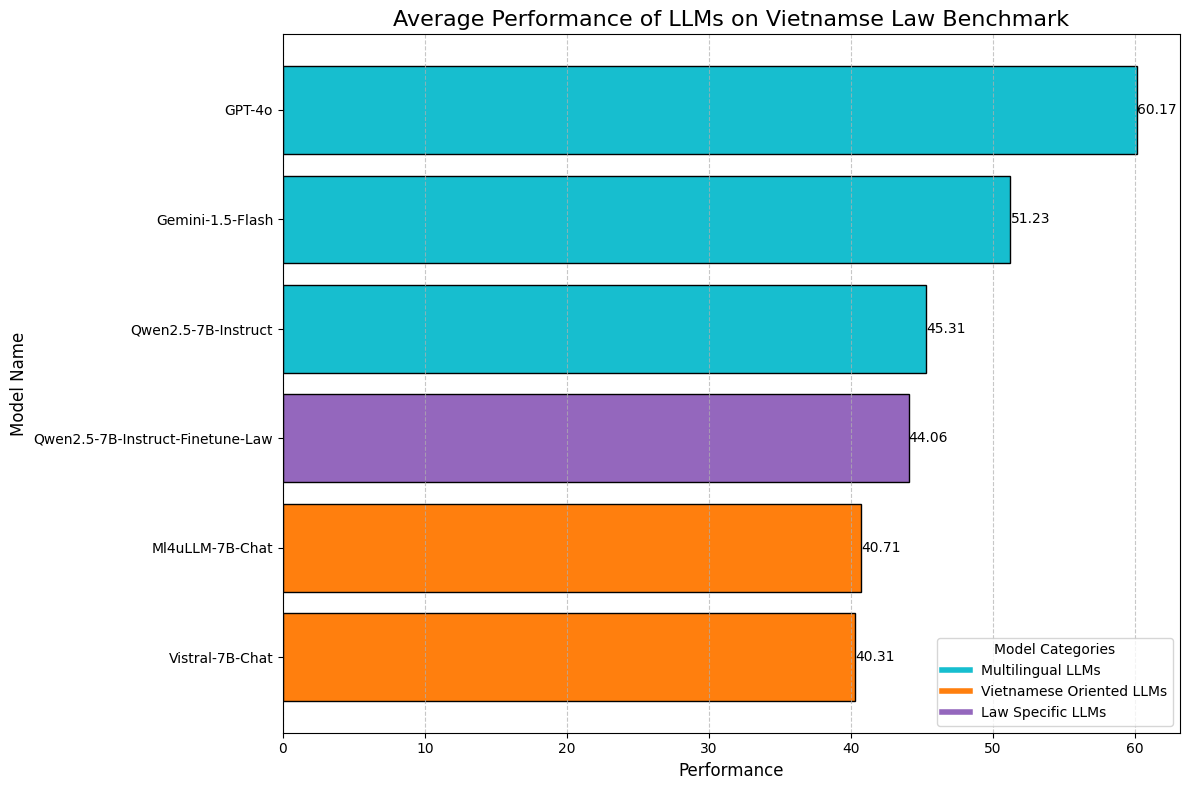

In [77]:
df = pd.DataFrame(data)

# Sort data by scores in descending order
df = df.sort_values(by='score', ascending=False)

# Set colors for each category
category_colors = {
    'Multilingual LLMs': '#17BECF',
    'Vietnamese Oriented LLMs': '#FF7F0E',
    'Law Specific LLMs': '#9467BD'
}

# Assign colors to models based on their category
df['color'] = df['category'].map(category_colors)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Draw horizontal bar chart
bars = ax.barh(df['model_name'], df['score'], color=df['color'], edgecolor='black')

# Add category labels to legend
handles = [
    plt.Line2D([0], [0], color=color, lw=4, label=category)
    for category, color in category_colors.items()
]
ax.legend(handles=handles, title="Model Categories", loc='lower right')

# Add score labels to bars
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + 0.01, bar.get_y() + bar.get_height()/2,
        f'{width:.2f}', va='center', fontsize=10
    )

# Customize axes
ax.set_xlabel("Performance", fontsize=12)
ax.set_ylabel("Model Name", fontsize=12)
ax.set_title("Average Performance of LLMs on Vietnamse Law Benchmark", fontsize=16)
ax.invert_yaxis()  # Highest scores at the top
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

### Chart 3

In [78]:
mapping_category = {
    "GPT-4o": "Multilingual LLMs",
    "Gemini-1.5-Flash": "Multilingual LLMs",
    "Qwen2.5-7B-Instruct": "Multilingual LLMs",
    "Vistral-7B-Chat": "Vietnamese Oriented LLMs",
    "Ml4uLLM-7B-Chat": "Vietnamese Oriented LLMs",
    "Qwen2.5-7B-Instruct-Finetune-Law": "Law Specific LLMs",
}

In [80]:
evaluation_df['score'] = evaluation_df['score'].apply(lambda x: round(x * 100, 2))
evaluation_df['Category'] = evaluation_df['model_name'].apply(lambda x: mapping_category[x])
evaluation_df

,task,model_name,score,abstention_rate,Category
0,1-1,Gemini-1.5-Flash,17.12,0.000000,Multilingual LLMs
1,1-2,Gemini-1.5-Flash,74.29,0.000000,Multilingual LLMs
2,2-1,Gemini-1.5-Flash,49.97,0.000000,Multilingual LLMs
3,2-10,Gemini-1.5-Flash,31.27,0.000000,Multilingual LLMs
4,2-2,Gemini-1.5-Flash,64.79,0.042254,Multilingual LLMs
...,...,...,...,...,...
103,3-3,Vistral-7B-Chat,63.19,0.000000,Vietnamese Oriented LLMs
104,3-4,Vistral-7B-Chat,88.89,0.000000,Vietnamese Oriented LLMs
105,3-5,Vistral-7B-Chat,79.44,0.014286,Vietnamese Oriented LLMs
106,3-6,Vistral-7B-Chat,47.14,0.214286,Vietnamese Oriented LLMs


In [126]:
# Group by 'task' and aggregate data to keep values intact
grouped = evaluation_df.groupby(['Category', 'model_name']).apply(lambda group: group.reset_index(drop=True)).reset_index(drop=True)

# Pivot the data to align with categories and tasks as in Figure 2
pivot_df = grouped.pivot_table(
    index="task",
    columns=["Category", "model_name"],
    values="score", #, "abstention_rate"],
    aggfunc=lambda x: x  # Keeps all values intact
)
pivot_df = pivot_df.reindex(['1-1', '1-2', '2-1', '2-2', '2-3', '2-4', '2-5', '2-6', '2-7',
       '2-9', '2-10', '3-1', '3-2', '3-3', '3-4', '3-5', '3-6', '3-7'])
pivot_df = pivot_df.T
pivot_df = pivot_df.reindex(["Multilingual LLMs", "Vietnamese Oriented LLMs", "Law Specific LLMs"], level=0)
pivot_df['Average'] = round(pivot_df.mean(axis =1),2)
pivot_df = pivot_df.T.style.set_table_styles([
    # Center-align all text
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    # Add borders for the entire table
    {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},
    {'selector': 'th, td', 'props': [('border', '1px solid black'), ('padding', '5px')]},
]).set_properties(**{
    'text-align': 'center'  # Ensure cell text is centered
}).format(precision=2)
pivot_df

/tmp/ipykernel_672625/2840801272.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = evaluation_df.groupby(['Category', 'model_name']).apply(lambda group: group.reset_index(drop=True)).reset_index(drop=True)
